# “Na dúvida, sempre comece pelas defasagens.
# Se nem o passado recente explica o futuro, talvez ninguém consiga explicar.”
- Leandro Guerra


In [1104]:
from tvDatafeed import TvDatafeed
from tvDatafeed import Interval
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [1105]:
tv = TvDatafeed() 

df = tv.get_hist(symbol = "WIN1!"
                 , exchange = "BMFBOVESPA"
                 , interval=Interval.in_1_minute
                 , n_bars=10000).drop(columns=['volume', 'symbol'])
df.index = pd.to_datetime(df.index)
df.head()


,open,high,low,close
datetime,,,,
2025-04-07 14:01:00,125650.0,125800.0,125350.0,125550.0
2025-04-07 14:02:00,125545.0,125680.0,125410.0,125620.0
2025-04-07 14:03:00,125620.0,126000.0,125600.0,125955.0
2025-04-07 14:04:00,125950.0,126065.0,125835.0,126000.0
2025-04-07 14:05:00,126000.0,126160.0,125935.0,126005.0


In [1106]:
df.to_csv('WIN1_BMF_1min.csv')

In [1107]:
# Vamos criar algumas defasagens, por exemplo (ou quantos períodos você quiser)
""" df['return_lag1'] = df['close'].pct_change().shift(1)
df['return_lag2'] = df['close'].pct_change().shift(2)
df['return_lag3'] = df['close'].pct_change().shift(3)
df['return_lag4'] = df['close'].pct_change().shift(4)
df['return_lag5'] = df['close'].pct_change().shift(5)
df['return_lag6'] = df['close'].pct_change().shift(6)
df['return_lag7'] = df['close'].pct_change().shift(7)
df['return_lag8'] = df['close'].pct_change().shift(8)
df['return_lag9'] = df['close'].pct_change().shift(9)
df['return_lag10'] = df['close'].pct_change().shift(10)
df['return_lag11'] = df['close'].pct_change().shift(11)
df['return_lag12'] = df['close'].pct_change().shift(12)
df['return_lag13'] = df['close'].pct_change().shift(13)
df['return_lag14'] = df['close'].pct_change().shift(14)
df['return_lag15'] = df['close'].pct_change().shift(15)
df['return_lag16'] = df['close'].pct_change().shift(16)
df['return_lag17'] = df['close'].pct_change().shift(17)
df['return_lag18'] = df['close'].pct_change().shift(18)
df['return_lag19'] = df['close'].pct_change().shift(19) """

" df['return_lag1'] = df['close'].pct_change().shift(1)\ndf['return_lag2'] = df['close'].pct_change().shift(2)\ndf['return_lag3'] = df['close'].pct_change().shift(3)\ndf['return_lag4'] = df['close'].pct_change().shift(4)\ndf['return_lag5'] = df['close'].pct_change().shift(5)\ndf['return_lag6'] = df['close'].pct_change().shift(6)\ndf['return_lag7'] = df['close'].pct_change().shift(7)\ndf['return_lag8'] = df['close'].pct_change().shift(8)\ndf['return_lag9'] = df['close'].pct_change().shift(9)\ndf['return_lag10'] = df['close'].pct_change().shift(10)\ndf['return_lag11'] = df['close'].pct_change().shift(11)\ndf['return_lag12'] = df['close'].pct_change().shift(12)\ndf['return_lag13'] = df['close'].pct_change().shift(13)\ndf['return_lag14'] = df['close'].pct_change().shift(14)\ndf['return_lag15'] = df['close'].pct_change().shift(15)\ndf['return_lag16'] = df['close'].pct_change().shift(16)\ndf['return_lag17'] = df['close'].pct_change().shift(17)\ndf['return_lag18'] = df['close'].pct_change().s

In [1108]:
# Mas vamos deixar isto mais elegante com uma função

def create_lags(df, col, n_lags):
    for i in range(1, n_lags + 1):
        df[f'{col}_lag{i}'] = df[col].shift(i)
    return df

In [1109]:
df["return"] = df['close'].pct_change(5)
df["volatility"] = df['close'].pct_change().rolling(window=20).std()


In [1110]:
df = create_lags(df, 'return', 20)
df = create_lags(df, 'volatility', 20)


In [1111]:
df.head()

,open,high,low,close,return,volatility,return_lag1,return_lag2,return_lag3,return_lag4,...,volatility_lag11,volatility_lag12,volatility_lag13,volatility_lag14,volatility_lag15,volatility_lag16,volatility_lag17,volatility_lag18,volatility_lag19,volatility_lag20
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-07 14:01:00,125650.0,125800.0,125350.0,125550.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-07 14:02:00,125545.0,125680.0,125410.0,125620.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-07 14:03:00,125620.0,126000.0,125600.0,125955.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-07 14:04:00,125950.0,126065.0,125835.0,126000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-07 14:05:00,126000.0,126160.0,125935.0,126005.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1112]:
# Criar subplots: 2 linhas, 1 coluna
fig = make_subplots(rows=1, cols=1, shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=("WIN - Fechamento"))

# Subplot 1: Fechamento
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['close'],
        name='Close',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Layout
fig.update_layout(
    height=600,
    width=900,
    title_text="WIN - www.outpsokenmarket.com",
    template='plotly_white',
    hovermode="x unified"
)

fig.update_layout(xaxis1_type='category')
fig.update_layout(xaxis1=dict(showticklabels=False, rangeslider=dict(visible=False)))

fig.show()

In [1113]:
# 1. Configuração de parâmetros
p = 10
return_cols = [f'return_lag{i}' for i in range(1, 21)]
volatility_cols = [f'volatility_lag{i}' for i in range(1, 21)] # O final do range é sempre o total de lags + 1

feature_cols = return_cols + volatility_cols


# 2. Criar retorno futuro
df['close_future_return'] = df['close'].pct_change(periods=p).shift(-p)

# 3. Preparar o dataset
df_reg = df[feature_cols + ['close_future_return']].dropna()

# 4. Split temporal
meio = len(df_reg) // 2
df_train, df_test = df_reg.iloc[:meio], df_reg.iloc[meio:]

# 5. Treinamento
X_train, y_train = df_train[feature_cols], df_train['close_future_return']
X_test, y_test = df_test[feature_cols], df_test['close_future_return']

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Avaliação
df_test = df_test.copy()
df_test['predicted_return'] = y_pred
costs =  1.5/26000
df_test['capital_curve'] = np.where(((df_test['predicted_return'] > 0))
                                    , df_test['close_future_return'] - costs
                                    , 0)

df_test['signal'] = np.where(((df_test['predicted_return'] > 0))
                                    , "Compra"
                                    , "Fica de fora")

df_test['capital_curve'] = df_test['capital_curve'].cumsum()*26000

print(f"R² no teste: {r2_score(y_test, y_pred):.4f}")
print("Coeficientes:")
for name, coef in zip(feature_cols, model.coef_):
    print(f"  {name}: {coef:.6f}")
print(f"Intercepto: {model.intercept_:.6f}")

# 7. Visualização
# Criar subplots: 2 linhas, 1 coluna
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=("Teste: Retorno Futuro vs Retorno Previsto", "Curva de Capital"))
fig.add_trace(go.Scatter(x=df_test.index, y=y_test * 100, name='Retorno Futuro Real', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_test.index, y=y_pred * 1000, name='Retorno Previsto', line=dict(color='orange')),row=1, col=1)
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['capital_curve'], name='Curva de Capital', line=dict(color='blue')),row=2, col=1)
fig.update_layout(
    title = "Modelo de Memória Linear - www.outspokenmarket.com",
    xaxis2_title='Data',
    yaxis1_title='Retorno (%)',
    yaxis2_title='Curva de Capital (R$)',
    template='plotly_white',
    height=600,
    width=900,
    hovermode='x unified'
)

fig.update_layout(xaxis1_type='category', xaxis2_type='category')
fig.update_layout(xaxis2=dict(showticklabels=False, rangeslider=dict(visible=False)))
fig.show()

R² no teste: -0.0406
Coeficientes:
  return_lag1: -0.065034
  return_lag2: -0.048464
  return_lag3: 0.066203
  return_lag4: -0.010907
  return_lag5: -0.072017
  return_lag6: -0.037906
  return_lag7: -0.062691
  return_lag8: 0.030673
  return_lag9: 0.029802
  return_lag10: -0.027044
  return_lag11: 0.010409
  return_lag12: -0.074174
  return_lag13: 0.009821
  return_lag14: -0.001598
  return_lag15: -0.029026
  return_lag16: 0.004947
  return_lag17: -0.022002
  return_lag18: -0.003434
  return_lag19: -0.047264
  return_lag20: -0.067080
  volatility_lag1: -0.204379
  volatility_lag2: -0.612941
  volatility_lag3: 0.236475
  volatility_lag4: -1.025088
  volatility_lag5: 0.023424
  volatility_lag6: 0.903901
  volatility_lag7: 0.554223
  volatility_lag8: 0.061565
  volatility_lag9: -0.028403
  volatility_lag10: 0.169089
  volatility_lag11: 0.397163
  volatility_lag12: 0.831495
  volatility_lag13: 0.179267
  volatility_lag14: -0.407821
  volatility_lag15: -0.306680
  volatility_lag16: -0.35835

In [1115]:
# Criar sinais: 1 se positivo, -1 se negativo, 0 se neutro (opcional)
df_test['signal_real'] = np.sign(df_test['close_future_return'])
df_test['signal_pred'] = np.sign(df_test['predicted_return'])

# Comparar sinais
df_test['acertou_direcao'] = df_test['signal_real'] == df_test['signal_pred']

# Calcular acurácia direcional
acuracia_direcional = df_test['acertou_direcao'].mean()

print(f"Acurácia direcional do modelo: {acuracia_direcional:.2%}")

Acurácia direcional do modelo: 52.53%


In [1116]:
# Criar uma nova coluna com apenas a data
df_test['date'] = df_test.index.date

# Calcular acurácia por dia
acuracia_por_dia = np.round(df_test.groupby('date')['acertou_direcao'].mean().to_frame(name='acuracia_direcional (%)')*100, 2)

print(acuracia_por_dia.tail(10))

            acuracia_direcional (%)
date                               
2025-04-15                    51.72
2025-04-16                    52.57
2025-04-17                    50.62
2025-04-22                    44.07
2025-04-23                    56.64
2025-04-24                    53.45
2025-04-25                    55.93
2025-04-28                    55.50


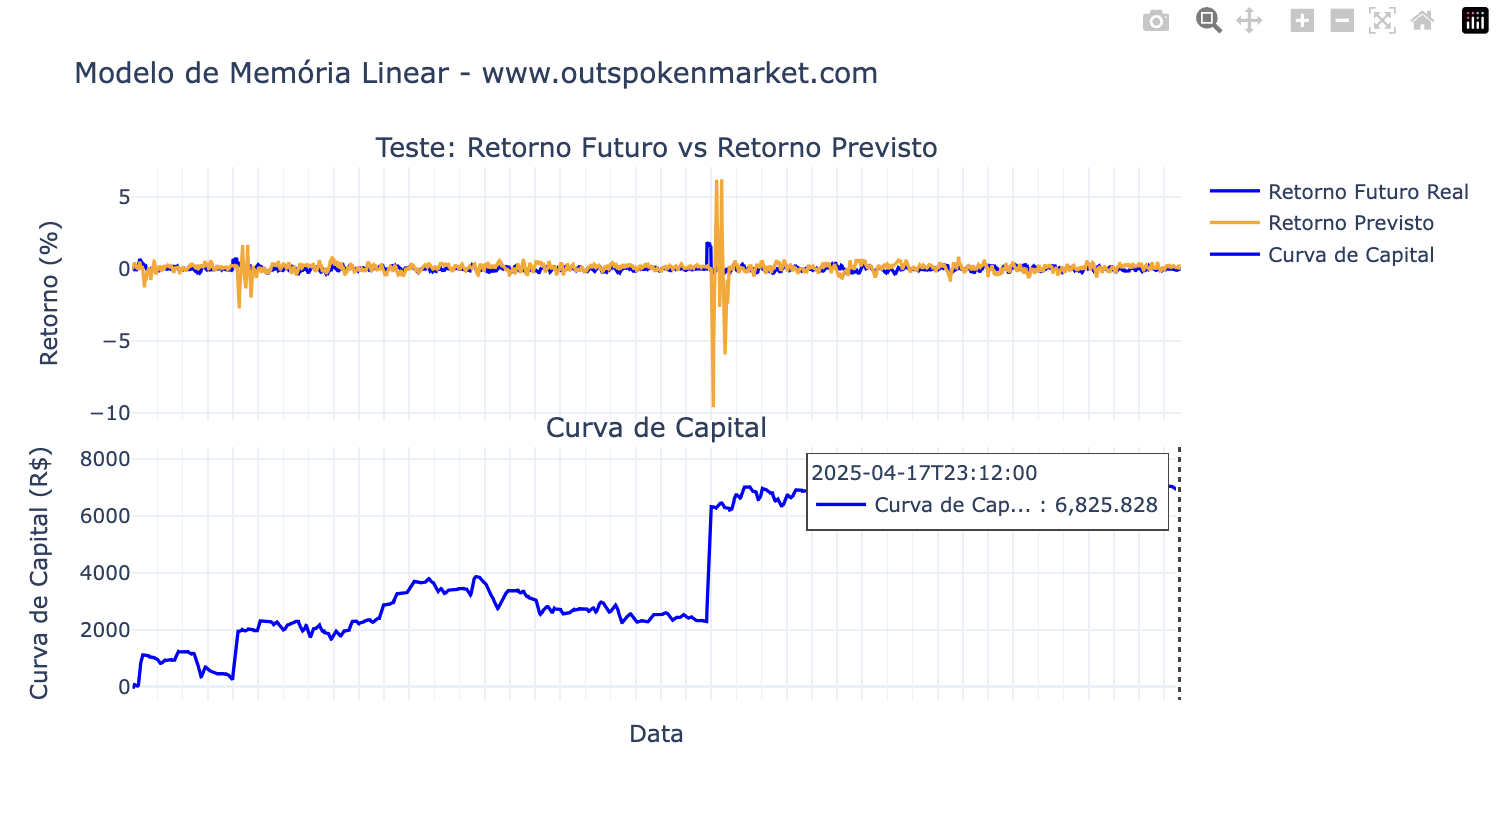